# Processamento dos Dados

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import import_ipynb
import services.especialidades as esp
import datetime
import math

## POSCOMP

### Dados da Homologação do POSCOMP

In [2]:
dados_homologados = pd.read_csv('dados/homologacao_poscomp/dados_homologados.csv')

In [3]:
dados_homologados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14575 entries, 0 to 14574
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   INSCRICAO   14575 non-null  object
 1   DATA NASC.  14575 non-null  object
 2   SEXO        14575 non-null  object
 3   ESTADO      14575 non-null  object
 4   ANO         14575 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 569.5+ KB


In [4]:
# elimina dados pertecentes ao Peru
dados_homologados = dados_homologados.loc[(dados_homologados['ESTADO']) != 'OU']

<Axes: xlabel='ANO'>

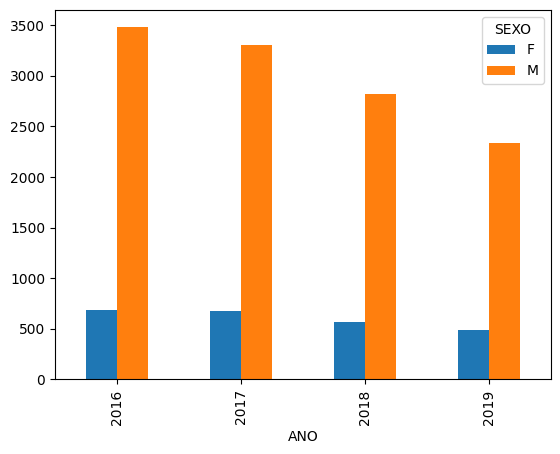

In [5]:
ano = [2016,2017,2018,2019]
dados_homologados.groupby('SEXO')['ANO'].value_counts().unstack(0).loc[ano].plot.bar()

<Axes: >

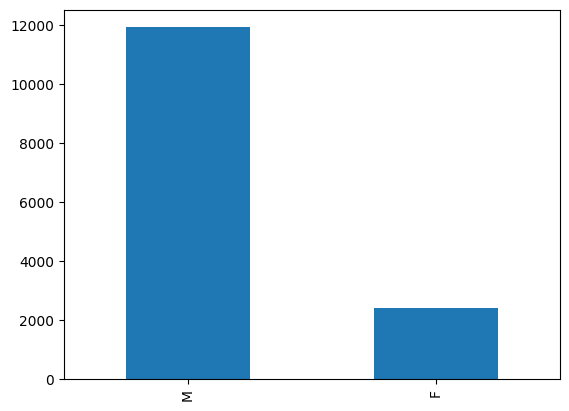

In [6]:
dados_homologados['SEXO'].value_counts().plot.bar()

In [7]:
dados_homologados = dados_homologados.set_index('INSCRICAO')

In [8]:
dados_homologados.drop(['688145', 'miamia'], inplace=True)

### Dados das Notas do POSCOMP

In [9]:
from textwrap import wrap

In [10]:
dados_notasRespostas = pd.read_csv('dados/notas_poscomp/dados_notasRespostas.csv')

In [11]:
dados_notasRespostas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79479 entries, 0 to 79478
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   INSCRICAO                                        79479 non-null  object 
 1   ESPECIALIDADE                                    78605 non-null  object 
 2   PRESENTE DIA1                                    79479 non-null  object 
 3   CARGO                                            79479 non-null  object 
 4   Matemática Discreta                              64543 non-null  float64
 5   Cálculo Diferencial e Integral                   64543 non-null  float64
 6   Álgebra Linear                                   64543 non-null  float64
 7   Geometria Analítica                              64543 non-null  float64
 8   Análise Combinatória                             64543 non-null  float64
 9   Probabilidade e Estatística 

### Realizar estudos por Regiões do Brasil

In [12]:
dados_homologados_cp = dados_homologados.copy()

In [13]:
dados_homologados['ESTADO'].unique()

array(['CE', 'RS', 'SP', 'PA', 'MT', 'AM', 'MS', 'PB', 'GO', 'RN', 'PR',
       'MG', 'SE', 'PE', 'ES', 'BA', 'RJ', 'AL', 'SC', 'MA', 'PI', 'DF',
       'RO', 'TO', 'RR', 'AP', 'AC'], dtype=object)

In [14]:
import services.lista_estados_regioes as lesr

importing Jupyter notebook from C:\Users\jeanc\Documentos\GitHub\project_dataScience_POSCOMP\services\lista_estados_regioes.ipynb


In [15]:
#Aqui estou adicionando as regioes dos estados brasileiros
for i in lesr.regioes_brasil_siglas:
    dados_homologados.loc[dados_homologados['ESTADO'].isin(lesr.regioes_brasil_siglas[i]), 'REGIAO'] = i

In [16]:
dados_homologados = dados_homologados.dropna()

In [17]:
dados_homologados.head()

,DATA NASC.,SEXO,ESTADO,ANO,REGIAO
INSCRICAO,,,,,
39401645886-1,29/11/1989,M,CE,2016,nordeste
39401663587-8,23/02/1995,M,RS,2016,sul
39401651770-6,13/12/1991,M,SP,2016,sudeste
39401671273-0,29/09/1986,M,PA,2016,norte
39402640298-8,26/11/1991,M,MT,2016,centro_oeste


### Converter as data de nascimento por idade

In [18]:
def age(idade):
    idade = datetime.strptime(idade, "%d/%m/%Y").date()
    today = date.today()
    return today.year - idade.year - ((today.month, today.day) < (idade.month, idade.day))

# df['Age'] = df['DOB'].apply(age)

In [19]:
from datetime import datetime, date

dados_homologados['IDADE'] = dados_homologados['DATA NASC.'].apply(age)

In [20]:
dados_homologados = dados_homologados.drop(columns=['DATA NASC.'])
dados_homologados.head()

,SEXO,ESTADO,ANO,REGIAO,IDADE
INSCRICAO,,,,,
39401645886-1,M,CE,2016,nordeste,33
39401663587-8,M,RS,2016,sul,28
39401651770-6,M,SP,2016,sudeste,31
39401671273-0,M,PA,2016,norte,36
39402640298-8,M,MT,2016,centro_oeste,31


### Juntar os dataframes

In [21]:
dados_homologados.shape

(14344, 5)

In [22]:
dados_homologados.info()
dados_homologados = dados_homologados.drop(columns=['ANO'])

<class 'pandas.core.frame.DataFrame'>
Index: 14344 entries, 39401645886-1 to 51801366900-3
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SEXO    14344 non-null  object
 1   ESTADO  14344 non-null  object
 2   ANO     14344 non-null  int64 
 3   REGIAO  14344 non-null  object
 4   IDADE   14344 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 672.4+ KB


In [23]:
# dados_respostas.info()
# dados_respostas = dados_respostas.drop(columns=['ANO'])

In [24]:
dados_notasRespostas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79479 entries, 0 to 79478
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   INSCRICAO                                        79479 non-null  object 
 1   ESPECIALIDADE                                    78605 non-null  object 
 2   PRESENTE DIA1                                    79479 non-null  object 
 3   CARGO                                            79479 non-null  object 
 4   Matemática Discreta                              64543 non-null  float64
 5   Cálculo Diferencial e Integral                   64543 non-null  float64
 6   Álgebra Linear                                   64543 non-null  float64
 7   Geometria Analítica                              64543 non-null  float64
 8   Análise Combinatória                             64543 non-null  float64
 9   Probabilidade e Estatística 

In [25]:
data_poscomp = pd.merge(dados_homologados, dados_notasRespostas, how='inner', on='INSCRICAO')

In [26]:
data_poscomp.shape

(77773, 34)

In [27]:
data_poscomp = data_poscomp.drop_duplicates(subset='INSCRICAO', keep='first')

In [28]:
data_poscomp = data_poscomp.query("ESPECIALIDADE.notnull()")

# Tratamento da especilidade dos candidatos

In [29]:
# Converter todos os elementos para minúsculas
data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].str.lower()

In [30]:
import re

# definir uma expressão regular para encontrar os caracteres '?'
def substituir_caracteres(df, caractere):
    regex = r'\b{}\b'.format(re.escape(caractere))

    # substituir os caracteres '?' por um caractere vazio em todas as linhas da coluna 'Texto'
    df['ESPECIALIDADE'] = df['ESPECIALIDADE'].apply(lambda x: re.sub(regex, '', x))
    
    return df

In [31]:
def remover_e(frase):
    if frase.endswith(" e"):
        frase = frase.rstrip(" e")
    # if frase.endswith(" a"):
    #     frase = frase.rstrip(" a")
    return frase

# # Aplicar a função em uma coluna do DataFrame
# dados_disciplinas['ESPECIALIDADE'] = dados_disciplinas['ESPECIALIDADE'].apply(remover_e)

In [32]:
def substituir_palavras(df, palavras_a_substituir, palavra_substituta):
    '''
    Substitui uma sequência de duas ou mais palavras por uma única palavra em um DataFrame do Pandas usando métodos.
    
    Parâmetros:
        df: DataFrame - o DataFrame contendo as palavras a serem substituídas.
        palavras_a_substituir: list - uma lista de palavras que serão substituídas por uma única palavra.
        palavra_substituta: str - a palavra que será usada para substituir a sequência de palavras.
        
    Retorna:
        DataFrame - um novo DataFrame com as palavras substituídas.
    '''
    # cria uma cópia do DataFrame para evitar a modificação do DataFrame original
    # df_novo = df.copy()
    
    # substitui as duas palavras por uma usando o método replace()
    df['ESPECIALIDADE'] = df['ESPECIALIDADE'].replace(palavras_a_substituir, palavra_substituta, regex=True)
    
    # retorna o novo DataFrame com as palavras substituídas
    return df

In [33]:
data_poscomp = substituir_caracteres(data_poscomp, '?',)
data_poscomp = substituir_caracteres(data_poscomp, '\\')
# dataset_analise = substituir_caracteres(dataset_analise, ' \')
data_poscomp = substituir_caracteres(data_poscomp, '\ ')

# Remover caracteres "\\"
data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].str.replace(r'\\', '')
data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].str.replace(r' à', '')

C:\Users\jeanc\AppData\Local\Temp\ipykernel_16344\2519017488.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].str.replace(r'\\', '')


In [34]:
# buscando as três primeiras palavras de cada texto sem as vírgulas
primeiras_palavras = data_poscomp['ESPECIALIDADE'].str.split().apply(lambda x: x[:3])

# adicionando as palavras como uma nova coluna no dataframe
data_poscomp['ESPECIALIDADE'] = primeiras_palavras

# removendo as vírgulas da coluna 'Primeiras Palavras'
data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].apply(lambda x: ' '.join(word.replace(',', '') for word in x))

# imprimindo o dataframe resultante

In [35]:
# # substituir as palavras por uma chamando a função substituir_palavras()
data_poscomp = substituir_palavras(data_poscomp, ['aprendizagem de máquinas','aprendizagem de ma?quina', 'aprendizagem de máquina','aprendizado de maquina'], 'aprendizado de máquina')
# dataset_analise = substituir_palavras(dataset_analise, ['?'], '')
data_poscomp = substituir_palavras(data_poscomp, ['computacao evolucionaria aprendizagem','computacão evolucionária aprendizagem'], 'computação evolucionária aprendizagem')
data_poscomp = substituir_palavras(data_poscomp, ['engenharia de tráfego','engenharia de trafego'], 'engenharia de tráfego')
data_poscomp = substituir_palavras(data_poscomp, ['inteligencia computacional', 'inteligencia artificial','inteligência artificial',
 'inteligência computacional', 'outrasinteligência artificial','lógica inteligência artificial', 'computação aplicadainteligência artificial'], 'inteligência artificial')
data_poscomp = substituir_palavras(data_poscomp, ['sistemas distribuidos', 'sistemas distribuídos', 'sistemas distribuídos e', 'algoritmos distribuídos'], 'sistemas distribuídos')
data_poscomp = substituir_palavras(data_poscomp, ['redes de comunicação', 'redes de comunicações'], 'redes de comunicações')
data_poscomp = substituir_palavras(data_poscomp, ['processamento gráfico','computação gráfica processamento','processamento gráfico interação',
                                                       'processamento gráfico e','processamento gráfico aplicado','processamento grafico'], 'redes de comunicações')

In [36]:
data_poscomp = substituir_palavras(data_poscomp, ['sistemas embarcados e',
 'sistemas embarcados',
 'sistemas embarcados evoluídos',
 'sistemas computacionais embarcados',
 'velha-sistemas embarcados e','sistemas embarcadosvoluídos',
 'velha-sistemas embarcados'], 'sistemas embarcados')

In [37]:
data_poscomp = substituir_palavras(data_poscomp,['visão computacional',
                                                 'visão e robótica', 'visão computacionale',
                                                 'robótica visão computacional', 'visão computacionalrealidade',
                                                 'visao computacional realidade', 'computação visual',
                                                 'visão computacional reconhecimento',
                                                 'visão computacional.', 'visão computacional realidade'], 'visão computacional')

In [38]:
data_poscomp = substituir_palavras(data_poscomp,['sistemas de computação','sistemas de computaçãoredes',
                                                           'sistemas de computaçãomicroeletrônica',
                                                           'sistemas de computaçãoarquitetura',
                                                           'sistemas de computaçãosistemas',
                                                           'sistemas de computaçãovisualização'], 'sistemas de computação')

data_poscomp = substituir_palavras(data_poscomp,['sistemas de informação', 'sistemas de informações','sistemas de informação',
 'sistema de informação'], 'sistemas de informação')
data_poscomp = substituir_palavras(data_poscomp,['redes de comunicações','redes de comunicações interação',
                                                           'redes de comunicações e','redes de comunicações aplicado'], 'redes de comunicações')       

In [39]:
data_poscomp = substituir_palavras(data_poscomp, ['banco de dados','bancos de dados','banco de dados/computação'], 'banco de dados')
data_poscomp = substituir_palavras(data_poscomp, ['mineração de dados','mineiração de dados'], 'mineração de dados')
data_poscomp = substituir_palavras(data_poscomp, ['inteligencia computacional', 'inteligencia artificial','inteligência artificial',
 'inteligência computacional', 'outrasinteligência artificial','computação aplicadainteligência artificial', 'outras inteligência artificial'], 'inteligência artificial')
data_poscomp = substituir_palavras(data_poscomp, ['engenharia de software', 'engenharia de sistemas', 'engenharia de software:'], 'engenharia de software')

In [40]:
data_poscomp = substituir_palavras(data_poscomp, ['sistemas inteligentes',
                                                            'sistemas inteligentes e','sistemas inteligentes.'], 'sistemas inteligentes')
data_poscomp = substituir_palavras(data_poscomp, ['algoritmos e grafos', 'algoritmos grafos'], 'algoritmos e grafos')
data_poscomp = substituir_palavras(data_poscomp, ['algoritmos otimização combinatória', 'algoritmos otimização'
                                                            'algoritmos e combinatória', 'outrasalgoritmos e combinatória',
                                                            'algoritmos e otimização','algoritmos otimização'], 'algoritmos e combinatória')


In [41]:
data_poscomp = substituir_palavras(data_poscomp,['computação gráfica imagens', 'computação gráfica'],'computação gráfica')
data_poscomp = substituir_palavras(data_poscomp,['computação aplicada', 'computação aplicada a', 'computação aplicadasistemas de',
 'computação aplicada ', 'computação aplicadasistemas', 'computação aplicadainteligência','computação inteligente aplicada'], 'computação aplicada')

In [42]:
data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].apply(remover_e)

In [43]:
f = data_poscomp[data_poscomp['ESPECIALIDADE'].str.contains('outra')]
f['ESPECIALIDADE'].sort_values().value_counts()
list(f['ESPECIALIDADE'].unique())

['outras algoritmos']

In [44]:
especialidades = data_poscomp['ESPECIALIDADE'].value_counts()[:20]
especialidades = pd.DataFrame(especialidades)
especialidades

,ESPECIALIDADE
engenharia de software,2086
inteligência artificial,2083
sistemas de computação,726
sistemas de informação,673
redes de computadores,470
banco de dados,453
computação aplicada,427
visão computacional,385
sistemas computacionais complexos,269
aprendizado de máquina,262


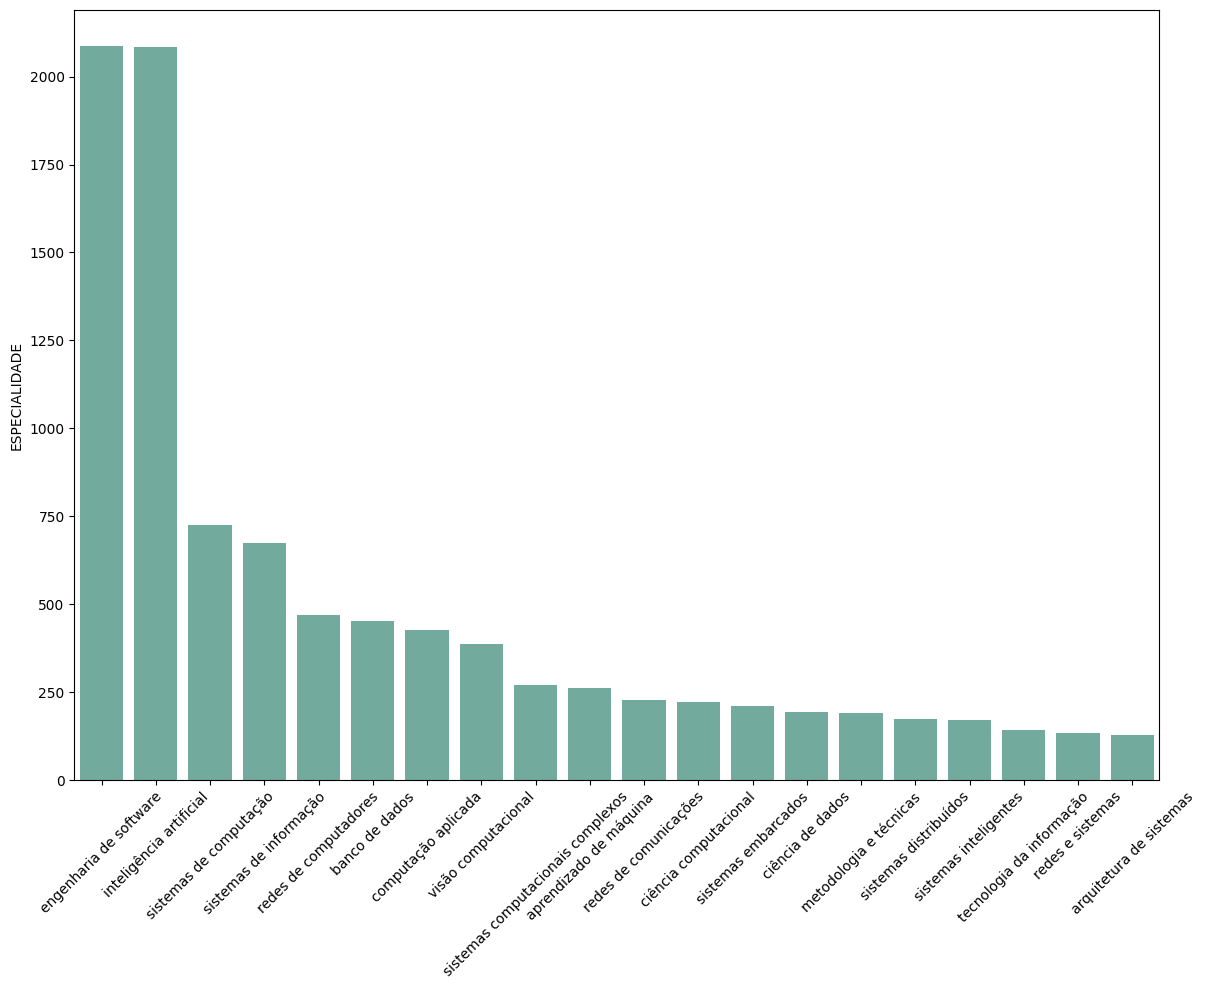

In [45]:
plt.figure(figsize=(14, 10))

# plot a bar chart
sns.barplot(
    y="ESPECIALIDADE", 
    x=especialidades.index, 
    data=especialidades, 
    color='#69b3a2', 
);
plt.xticks(rotation=45);
plt.savefig('espec.png', dpi = 300, bbox_inches='tight')

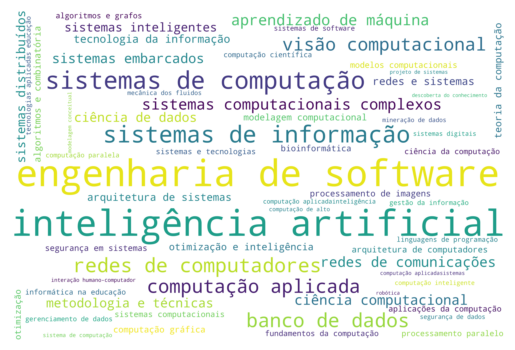

In [46]:
# Libraries
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import string

text = data_poscomp['ESPECIALIDADE'].value_counts()[:60]
text = text.to_dict()

stopwords = set(['o', 'a', 'e', 'é', 'de', 'da', 'do', 'para', ' e'])

# Create the wordcloud object
wordcloud2 = WordCloud(background_color="white",
                       # random_state=1, 
                       min_word_length=3,
                        width=6000, height=4000,
                        stopwords=stopwords
                       ).generate_from_frequencies(text)
# WordCloud.generate_from_frequencies

# Display the generated image:
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
# plt.margins(x=0, y=0)
plt.savefig('imagens/nuvem_palavras.eps', format='eps', dpi = 300, bbox_inches='tight')
plt.show()

In [54]:
import pandas as pd

# Agrupa os dados por estado e conta a ocorrência de cada área
contagem_areas = data_poscomp.groupby(['ESTADO', 'ESPECIALIDADE']).size().reset_index(name='CONTAGEM')

# Ordena os dados por estado e contagem em ordem decrescente
contagem_areas = contagem_areas.sort_values(['ESTADO', 'CONTAGEM'], ascending=[True, False])

# Obtém a área mais frequente para cada estado
areas_mais_frequentes = contagem_areas.groupby('ESTADO').first().reset_index()

# Exibe o resultado
print(areas_mais_frequentes)

   ESTADO                   ESPECIALIDADE  CONTAGEM
0      AC                  banco de dados         1
1      AL          engenharia de software       106
2      AM         inteligência artificial        27
3      AP          engenharia de software         6
4      BA          engenharia de software        48
5      CE           ciência computacional       195
6      DF          engenharia de software        15
7      ES          sistemas de informação       169
8      GO          engenharia de software       168
9      MA         arquitetura de sistemas       110
10     MG         inteligência artificial       325
11     MS          engenharia de software       119
12     MT          engenharia de software        37
13     PA          engenharia de software       189
14     PB          engenharia de software       222
15     PE          engenharia de software        13
16     PI          sistemas de computação       159
17     PR         inteligência artificial       277
18     RJ   

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


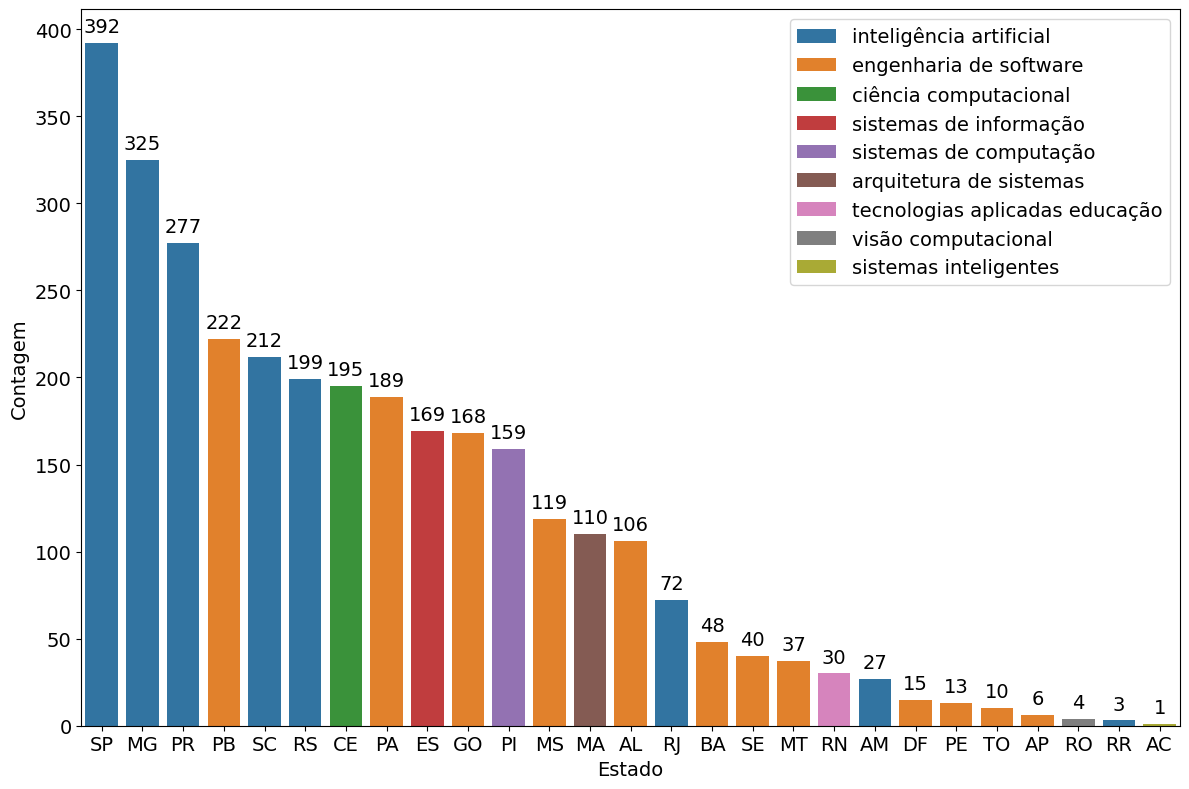

In [65]:
# Agrupa os dados por estado e conta a ocorrência de cada área
contagem_areas = data_poscomp.groupby(['ESTADO', 'ESPECIALIDADE']).size().reset_index(name='CONTAGEM')

# Obtém a área mais frequente para cada estado
areas_mais_frequentes = contagem_areas.sort_values('CONTAGEM', ascending=False).drop_duplicates('ESTADO')

# Ordena os dados por contagem em ordem decrescente
areas_mais_frequentes = areas_mais_frequentes.sort_values('CONTAGEM', ascending=False)

# Plota o gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=areas_mais_frequentes, x='ESTADO', y='CONTAGEM', hue='ESPECIALIDADE',dodge=False )

for p in ax.patches:
    if not math.isnan(p.get_height()):
        ax.annotate(int(p.get_height()),
                    xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center',
                    va='bottom',
                    fontsize=14)
        
ax.set_xlabel('Estado', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
# ax.set_title('Área mais Frequente por Estado', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(title='', fontsize=14)
plt.tight_layout()
plt.savefig('imagens/especialidade_frequenteEstado.eps', format='eps', dpi = 600, bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(18,10))
sns.set_style(style='ticks')
ax = sns.barplot(data=areas_mais_frequentes.sort_values(['candidatos'], ascending=False),
            y='candidatos',
            x='ESTADO',
            hue='REGIAO',
            dodge=False,
            # color='hsv'
           )
for p in ax.patches:
    if not math.isnan(p.get_height()):
        ax.annotate(int(p.get_height()),
                    xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center',
                    va='bottom',
                    fontsize=16)
plt.xlabel('Unidade Federativa', fontsize=18)
plt.ylabel('Quantidade de participantes', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
legend = plt.legend(title='Região', fontsize=16)
legend.get_title().set_fontsize(18)
plt.savefig('imagens/inscritos2.eps', dpi=600, bbox_inches='tight')
plt.show()

### Salvar os dados

In [ ]:
# data_poscomp.to_csv('dados/dataset_poscomp.csv', index=False)